In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
import json
import glob
import random
import collections
from glob import glob
import numpy as np
import pandas as pd
#import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
import keras
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
import json
import glob
import random
import collections
from glob import glob
import numpy as np
import pandas as pd
#import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import seaborn as sns
import shutil
import keras
from PIL import Image
#import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import keras
import json
import tensorflow as tf 
from keras.layers import Input
from keras import Sequential
from keras.layers import Dense, LSTM,Flatten, TimeDistributed, Conv2D, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import re
import string

tfds.disable_progress_bar()
from keras.models import load_model
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D,Reshape, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten, UpSampling2D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    tn = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1-y_true) * (y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip((y_true) * (1-y_pred), 0, 1)))
    

    f1_val = tp / ( tp + ( (1/2) * (fp+fn) ) + K.epsilon())
    return f1_val
from PIL import Image

In [2]:
from glob import glob
import cv2
trn1='D:/INV/data/To Baylor 2023-01-30/To Baylor 2023-01-30/Not Veligers/*/'
trn2='D:/INV/data/To Baylor 2023-01-30/To Baylor 2023-01-30/Ostracod Image1/*/'
trn3='D:/INV/data/To Baylor 2023-01-30/To Baylor 2023-01-30/Zebra Pediveliger Image1a/*/'
tr1= glob(trn1)
tr2= glob(trn2)
tr3= glob(trn3)

In [3]:
trn11='D:/INV/data/invasive-aquatic-species-data/noninvasive/*/'
trn33='D:/INV/data/invasive-aquatic-species-data/invasive/*/'
tr11= glob(trn11)
tr33= glob(trn33)
tr1.extend(tr11)
tr3.extend(tr33)

trn111='D:/INV/data/Baylor 2022-03-21/Baylor 2022-03-21/Davis Dam 2019-07-24/Manually Reviewed/NonVeligers/Images_001/*/'
trn333='D:/INV/data/Baylor 2022-03-21/Baylor 2022-03-21/Davis Dam 2019-07-24/Manually Reviewed/Veligers/Images_001/*/'
tr111= glob(trn111)
tr333= glob(trn333)
tr1.extend(tr111)
tr3.extend(tr333)

In [4]:
trnl1='D:/Ostracod/Ostracod Day 2 Image12 Short To Baylor/Ostracod Day 2 Image12 To Baylor/Sorted Images/Ostracods/*/'
trnl2='D:/Ostracod/Ostracods Day 2 Image1 To Baylor/Ostracods Day 2 Image1 To Baylor/Sorted Images/Ostracods/*/'
trnl3='D:/Ostracod/Ostracods Day 2 Image2 To Baylor/Ostracods Day 2 Image2 To Baylor/Sorted Images/Ostracods/*/'
trnl4='D:/Ostracod/Ostracods Day 2 Image3 To Baylor/Ostracods Day 2 Image3 To Baylor/Sorted Images/Ostracods/*/'
trnl5='D:/Ostracod/Ostracods Day 2 Image12 To Baylor/Ostracods Day 2 Image12 To Baylor/Sorted Images/Ostracods/*/'
trl1= glob(trnl1)
trl2= glob(trnl2)
trl3= glob(trnl3)
trl4= glob(trnl4)
trl5= glob(trnl5)
tr2.extend(trl1)
tr2.extend(trl2)
tr2.extend(trl3)
tr2.extend(trl4)
tr2.extend(trl5)

In [15]:
tr1

['D:/INV/data/To Baylor 2023-01-30/To Baylor 2023-01-30/Not Veligers\\Object_003\\',
 'D:/INV/data/To Baylor 2023-01-30/To Baylor 2023-01-30/Not Veligers\\Object_005\\',
 'D:/INV/data/To Baylor 2023-01-30/To Baylor 2023-01-30/Not Veligers\\Object_007\\',
 'D:/INV/data/To Baylor 2023-01-30/To Baylor 2023-01-30/Not Veligers\\Object_041\\',
 'D:/INV/data/To Baylor 2023-01-30/To Baylor 2023-01-30/Not Veligers\\Object_048\\',
 'D:/INV/data/To Baylor 2023-01-30/To Baylor 2023-01-30/Not Veligers\\Object_051\\',
 'D:/INV/data/To Baylor 2023-01-30/To Baylor 2023-01-30/Not Veligers\\Object_052\\',
 'D:/INV/data/To Baylor 2023-01-30/To Baylor 2023-01-30/Not Veligers\\Object_053\\',
 'D:/INV/data/To Baylor 2023-01-30/To Baylor 2023-01-30/Not Veligers\\Object_054\\',
 'D:/INV/data/To Baylor 2023-01-30/To Baylor 2023-01-30/Not Veligers\\Object_055\\',
 'D:/INV/data/To Baylor 2023-01-30/To Baylor 2023-01-30/Not Veligers\\Object_056\\',
 'D:/INV/data/To Baylor 2023-01-30/To Baylor 2023-01-30/Not Velig

In [5]:
tran_index_inv = np.round( len(tr1)* .7  )
tran_index_noninv = np.round( len(tr2)* .7  )
tran_index_osc = np.round( len(tr3)* .7  )
tran_index_inv

2997.0

In [147]:
tran_index_osc

641.0

In [6]:
data = []
label = []
breath = []
total = 0
Xtrain_size = []
snw = 0
snh = 0
for j in tr1[:(int) (tran_index_inv)]:
    label.append(0)
    a = glob(j+'/*')
    breath.append(len(a)) 
    total = total + len(a)


for j in tr2[:(int)(tran_index_noninv)]:
    label.append(1)
    a = glob(j+'/*')
    breath.append(len(a))
    total = total + len(a)
        
for j in tr3[:(int)(tran_index_osc)]:
    label.append(2)
    a = glob(j+'/*')
    breath.append(len(a))
    total = total + len(a)
    
for j in range(0,len(tr1[:(int) (tran_index_inv)])):
    a = glob(tr1[j]+'/*')
    sn = []
    snh = 0
    snw = 0
    for k in range(0,len(a)):
        b = Image.open(a[k])
        width, height = b.size
        snh = snh + height
        snw = snw + width
    snh = snh/len(a)
    snw = snw/len(a)
    sn.append(snw)
    sn.append(snh)
    Xtrain_size.append(sn)
    for k in range(0,5):
        data.append(a[k])

for j in range(0,len(tr2[:(int) (tran_index_noninv)])):
    a = glob(tr2[j]+'/*')
    sn = []
    snh = 0
    snw = 0
    for k in range(0,len(a)):
        b = Image.open(a[k])
        width, height = b.size
        snh = snh + height
        snw = snw + width
    snh = snh/len(a)
    snw = snw/len(a)
    sn.append(snw)
    sn.append(snh)
    Xtrain_size.append(sn)
    for k in range(0,5):
        data.append(a[k])  
        
for j in range(0,len(tr3[:(int) (tran_index_osc)])):
    a = glob(tr3[j]+'/*')
    sn = []
    snh = 0
    snw = 0
    for k in range(0,len(a)):
        b = Image.open(a[k])
        width, height = b.size
        snh = snh + height
        snw = snw + width
    snh = snh/len(a)
    snw = snw/len(a)
    sn.append(snw)
    sn.append(snh)
    Xtrain_size.append(sn)
    for k in range(0,5):
        data.append(a[k])

imgdata=[]
for i in range(len(data)):
    a = Image.open(data[i])
    b = a.resize((48, 48))
    c = np.array(b)
    imgdata.append(c.reshape(48,48,3))
    
from tensorflow.keras.utils import to_categorical
idata = np.array(imgdata)
X_train = idata
X_train = X_train.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train),48,48,3))

In [7]:
end= 0
train_df= []
breath = 5

i = 0
for i in range(0, len(label)):
    deff = []
    for k in range(0, (breath)):
        
        index = (i*5+k)
        
        deff.append(X_train[index])
        
    train_df.append(deff)

Y_train = to_categorical(label)
train_df = np.array(train_df)
YY_Train = label
np.shape(train_df)
data = Xtrain_size
data_norm = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
Xtrain_size1 = data_norm.astype('float32')

In [100]:
np.shape(Xtrain_size1)

(3680, 2)

In [8]:
data = []
label = []
breath = []
total = 0
Xtest_size = []
snw = 0
snh = 0
for j in tr1[(int) (tran_index_inv):]:
    label.append(0)
    a = glob(j+'/*')
    breath.append(len(a)) 
    total = total + len(a)


for j in tr2[(int)(tran_index_noninv):]:
    label.append(1)
    a = glob(j+'/*')
    breath.append(len(a))
    total = total + len(a)
        
for j in tr3[(int)(tran_index_osc):]:
    label.append(2)
    a = glob(j+'/*')
    breath.append(len(a))
    total = total + len(a)
    
for j in range(0,len(tr1[(int) (tran_index_inv):])):
    a = glob(tr1[j]+'/*')
    sn = []
    snh = 0
    snw = 0
    for k in range(0,len(a)):
        b = Image.open(a[k])
        width, height = b.size
        snh = snh + height
        snw = snw + width
    snh = snh/len(a)
    snw = snw/len(a)
    sn.append(snw)
    sn.append(snh)
    Xtest_size.append(sn)
    for k in range(0,5):
        data.append(a[k])

for j in range(0,len(tr2[(int) (tran_index_noninv):])):
    a = glob(tr2[j]+'/*')
    sn = []
    snh = 0
    snw = 0
    for k in range(0,len(a)):
        b = Image.open(a[k])
        width, height = b.size
        snh = snh + height
        snw = snw + width
    snh = snh/len(a)
    snw = snw/len(a)
    sn.append(snw)
    sn.append(snh)
    Xtest_size.append(sn)
    for k in range(0,5):
        data.append(a[k])  
        
for j in range(0,len(tr3[(int) (tran_index_osc):])):
    a = glob(tr3[j]+'/*')
    sn = []
    snh = 0
    snw = 0
    for k in range(0,len(a)):
        b = Image.open(a[k])
        width, height = b.size
        snh = snh + height
        snw = snw + width
    snh = snh/len(a)
    snw = snw/len(a)
    sn.append(snw)
    sn.append(snh)
    Xtest_size.append(sn)
    for k in range(0,5):
        data.append(a[k])

imgdata=[]
for i in range(len(data)):
    a = Image.open(data[i])
    b = a.resize((48, 48))
    c = np.array(b)
    imgdata.append(c.reshape(48,48,3))
    
    
from tensorflow.keras.utils import to_categorical
idata = np.array(imgdata)
X_test = idata
X_test = X_test.astype('float32') / 255.
X_test = np.reshape(X_test, (len(X_test),48,48,3))


In [9]:
end= 0
test_df= []
breath = 5

i = 0
for i in range(0, len(label)):
    deff = []
    for k in range(0, (breath)):
        
        index = (i*5+k)
        
        deff.append(X_test[index])
        
    test_df.append(deff)
    
Y_test = to_categorical(label)
test_df = np.array(test_df)
YY_Test = label
np.shape(test_df)
data = Xtest_size
data_norm = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
Xtest_size1 = data_norm.astype('float32')

In [103]:
np.shape(Xtest_size1)

(1578, 2)

In [70]:
Xtest_size[995]

[22.636363636363637, 19.363636363636363]

In [10]:
DATASET_NAME = "organmnist3d"
BATCH_SIZE = 32
AUTO = tf.data.AUTOTUNE
INPUT_SHAPE = ( 5, 48, 48, 3 )
NUM_CLASSES = 2

# OPTIMIZER
LEARNING_RATE = 1e-4
WEIGHT_DECAY = 1e-5

# TRAINING
EPOCHS = 60

# TUBELET EMBEDDING
PATCH_SIZE = (4, 8, 8)
NUM_PATCHES = (INPUT_SHAPE[0] // PATCH_SIZE[0]) ** 2

# ViViT ARCHITECTURE
LAYER_NORM_EPS = 1e-6
PROJECTION_DIM = 32
NUM_HEADS = 2
NUM_LAYERS = 2



In [11]:
#Patch Encoder with Conv2D ,  LSTM , Pos_Emd

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection =keras.Sequential(
            [
                (layers.Conv2D(16, (3, 3), strides=(1,1),activation='relu')),
                TimeDistributed(MaxPooling2D(2,2)),
                TimeDistributed(Flatten()),
                layers.Dense(projection_dim)
            ]) 
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded 

In [12]:
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models

inputs = layers.Input(shape= (5,48,48,3) )

encoded_patches = (PatchEncoder(5, 32 )) (inputs)

for _ in range(6):
    
    x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)

    attention_output = layers.MultiHeadAttention (  num_heads=6, key_dim=32, dropout=0.1 )  (x1, x1)
    
    lstm_output =  LSTM(32,return_sequences=True,dropout=0.1)(x1)

    x2 = layers.Add()([attention_output, encoded_patches,lstm_output])

        # Layer Normalization and MLP
    x3 = layers.LayerNormalization(epsilon=1e-6)(x2)


    x3 = keras.Sequential(layers.Dense(units=32, activation=tf.nn.gelu) )(x3)

        # Skip connection
    encoded_patches = layers.Add()([x3, x2])

    # Layer normalization and Global average pooling.
representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)

representation = layers.GlobalAvgPool1D()(representation)

#representation = LSTM(100,return_sequences=False,dropout=0.1)(representation)

outputs = layers.Dense(units=3, activation="softmax") ( representation)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5, 48, 48,   0           []                               
                                3)]                                                               
                                                                                                  
 patch_encoder (PatchEncoder)   (None, 5, 32)        271488      ['input_1[0][0]']                
                                                                                                  
 layer_normalization (LayerNorm  (None, 5, 32)       64          ['patch_encoder[0][0]']          
 alization)                                                                                       
                                                                                              

In [13]:
train_df,Y_train,Xtrain_size1 = shuffle (train_df,Y_train,Xtrain_size1)

In [14]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
model.fit(train_df,Y_train,validation_split=0.2,batch_size=32,epochs=50)

Epoch 1/50
92/92 [==============================] - 35s 133ms/step - loss: 0.3953 - accuracy: 0.8441 - val_loss: 0.2317 - val_accuracy: 0.9117
Epoch 2/50
92/92 [==============================] - 7s 74ms/step - loss: 0.2353 - accuracy: 0.9049 - val_loss: 0.1760 - val_accuracy: 0.9334
Epoch 3/50
92/92 [==============================] - 7s 72ms/step - loss: 0.1987 - accuracy: 0.9236 - val_loss: 0.1645 - val_accuracy: 0.9348
Epoch 4/50
92/92 [==============================] - 7s 72ms/step - loss: 0.1597 - accuracy: 0.9355 - val_loss: 0.2188 - val_accuracy: 0.9008
Epoch 5/50
92/92 [==============================] - 6s 70ms/step - loss: 0.1567 - accuracy: 0.9361 - val_loss: 0.1269 - val_accuracy: 0.9606
Epoch 6/50
92/92 [==============================] - 7s 71ms/step - loss: 0.1427 - accuracy: 0.9416 - val_loss: 0.1405 - val_accuracy: 0.9402
Epoch 7/50
92/92 [==============================] - 6s 71ms/step - loss: 0.1456 - accuracy: 0.9365 - val_loss: 0.2367 - val_accuracy: 0.8845
Epoch 8/50


In [15]:
score, acc = model.evaluate(test_df, Y_test,batch_size=32)

print('Test score:', score)
print('Test accuracy:', acc)


50/50 [==============================] - 3s 22ms/step - loss: 0.0729 - accuracy: 0.9759
Test score: 0.07285149395465851
Test accuracy: 0.9759188890457153


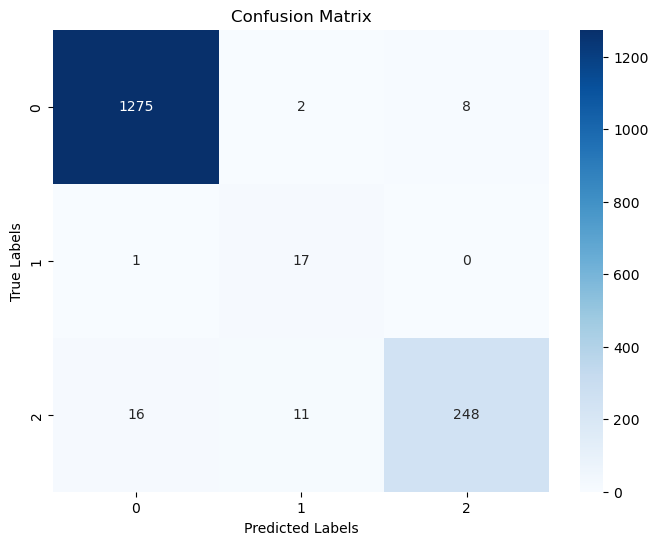

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

te_df = model.predict(test_df,batch_size=32)
y_pred = np.argmax(te_df, axis=1)
y_true = np.argmax(Y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# create confusion matrix
cm = confusion_matrix(Y_test.argmax(axis=1), te_df.argmax(axis=1))

# plot confusion matrix as heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()


In [178]:
from sklearn.utils import class_weight
class_weight = {0: 1, 1: 2 , 2 : 5 }
tt_df = model.predict(train_df,batch_size = 32)
combined_train = (np.concatenate((tt_df,) Xtrain_size1)
np.shape(combined_train)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear',class_weight=class_weight)
clf.fit(combined_train, YY_Train)

SVC(class_weight={0: 1, 1: 2, 2: 5}, kernel='linear')

0.7769328263624842


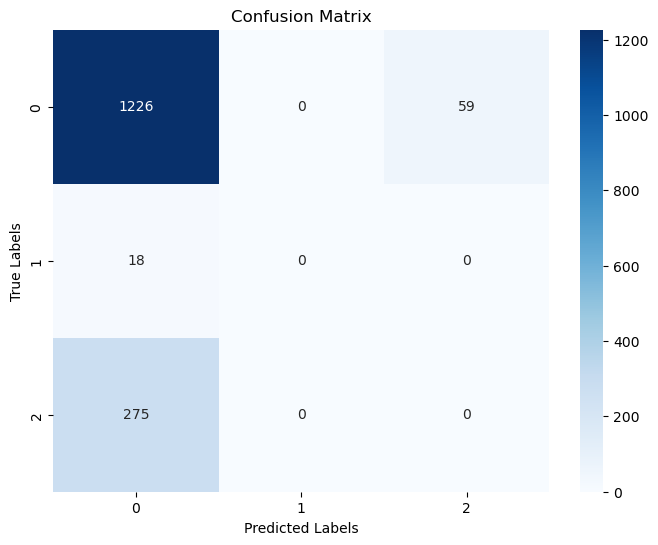

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from sklearn.utils import class_weight
class_weight = {0: 1, 1: 2. , 2 : 4.5 }
tt_df = model.predict(train_df,batch_size = 32)
combined_train = np.concatenate((tt_df, Xtrain_size1), axis=1)
np.shape(combined_train)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(combined_train, YY_Train)

combined_test = np.concatenate((te_df, Xtest_size1), axis=1)

y_pred = clf.predict(combined_test)
acc_score = accuracy_score(YY_Test, y_pred)
print(acc_score)

# Compute confusion matrix
cm = confusion_matrix(YY_Test, y_pred)

# create confusion matrix
cm = confusion_matrix(YY_Test, y_pred)

# plot confusion matrix as heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()


In [124]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
model.fit(train_df,Y_train,validation_split=0.2,batch_size=32,epochs=30)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

te_df = model.predict(test_df,batch_size=32)
y_pred = np.argmax(te_df, axis=1)
y_true = np.argmax(Y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# create confusion matrix
cm = confusion_matrix(Y_test.argmax(axis=1), te_df.argmax(axis=1))

# plot confusion matrix as heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()


(3680, 5)